In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pickle
import sys
from pathlib import Path

# Añadir directorio raíz al path
sys.path.append(str(Path().resolve().parent))

from src.config import PROCESSED_DATA_DIR, MODELS_DIR, RANDOM_STATE, TEST_SIZE, TARGET_COLUMN

# Cargar datos procesados
df = pd.read_csv(PROCESSED_DATA_DIR / "startup_data_processed.csv")

# Separar features y target
X = df.drop(TARGET_COLUMN, axis=1)
y = df[TARGET_COLUMN]

# División en train-test 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (738, 5432)
Tamaño del conjunto de prueba: (185, 5432)



--- Entrenando Árbol de Decisión ---
Accuracy en train: 1.0000
Accuracy en test: 1.0000

Reporte de clasificación:
              precision    recall  f1-score   support

    acquired       1.00      1.00      1.00       120
      closed       1.00      1.00      1.00        65

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185



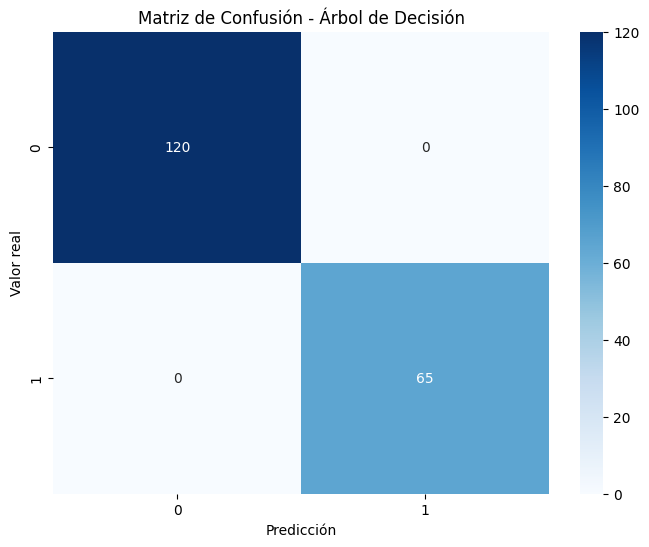

In [4]:
# Modelo base: Árbol de Decisión
print("\n--- Entrenando Árbol de Decisión ---")
dt_classifier = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt_classifier.fit(X_train, y_train)

# Evaluación en train y test
dt_train_pred = dt_classifier.predict(X_train)
dt_test_pred = dt_classifier.predict(X_test)

print(f"Accuracy en train: {accuracy_score(y_train, dt_train_pred):.4f}")
print(f"Accuracy en test: {accuracy_score(y_test, dt_test_pred):.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, dt_test_pred))

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, dt_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.savefig('../reports/figures/model_performance/dt_confusion_matrix.png')
plt.show()


--- Entrenando Regresión Logística ---
Accuracy en train: 1.0000
Accuracy en test: 1.0000

Reporte de clasificación:
              precision    recall  f1-score   support

    acquired       1.00      1.00      1.00       120
      closed       1.00      1.00      1.00        65

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185



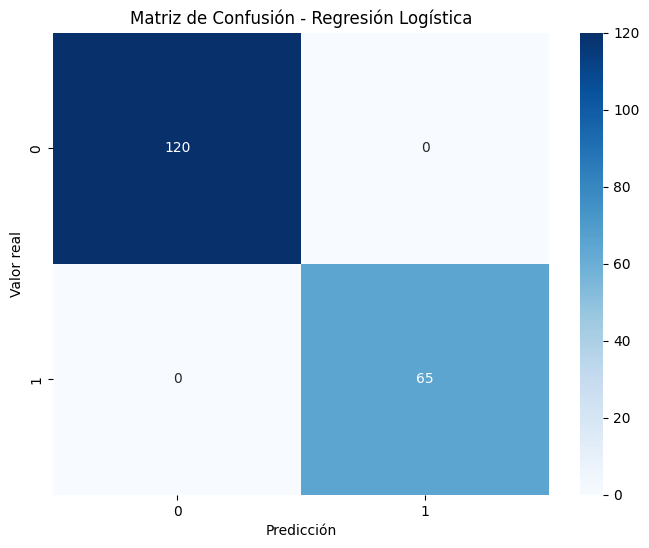

In [5]:
# Modelo baseline: Regresión Logística
print("\n--- Entrenando Regresión Logística ---")
lr_classifier = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
lr_classifier.fit(X_train, y_train)

# Evaluación en train y test
lr_train_pred = lr_classifier.predict(X_train)
lr_test_pred = lr_classifier.predict(X_test)

print(f"Accuracy en train: {accuracy_score(y_train, lr_train_pred):.4f}")
print(f"Accuracy en test: {accuracy_score(y_test, lr_test_pred):.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, lr_test_pred))

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, lr_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.savefig('../reports/figures/model_performance/lr_confusion_matrix.png')
plt.show()

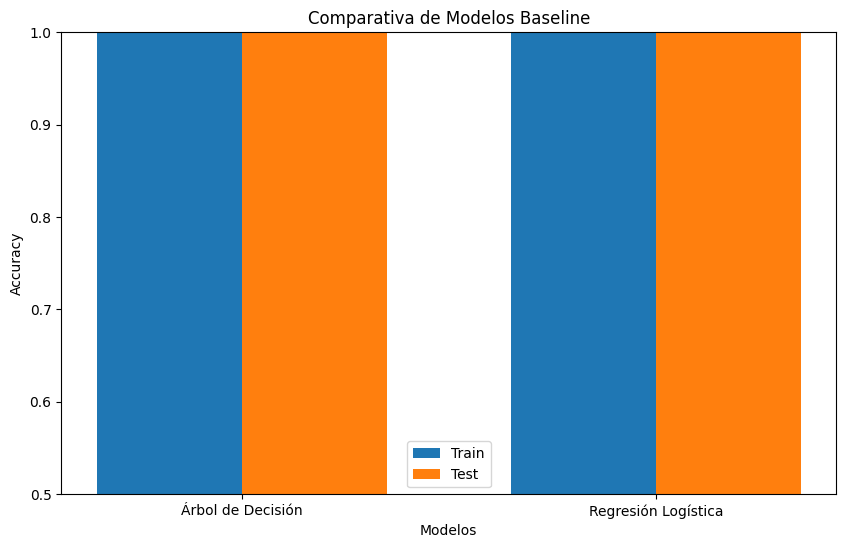

In [6]:
# Comparativa de modelos baseline
models = ['Árbol de Decisión', 'Regresión Logística']
train_scores = [
    accuracy_score(y_train, dt_train_pred),
    accuracy_score(y_train, lr_train_pred)
]
test_scores = [
    accuracy_score(y_test, dt_test_pred),
    accuracy_score(y_test, lr_test_pred)
]

plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_scores, width, label='Train')
plt.bar(x + width/2, test_scores, width, label='Test')

plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Comparativa de Modelos Baseline')
plt.xticks(x, models)
plt.legend()
plt.ylim(0.5, 1.0)
plt.savefig('../reports/figures/model_performance/baseline_comparison.png')
plt.show()

In [7]:
# Guardar modelos baseline
import os
os.makedirs(MODELS_DIR / "baseline", exist_ok=True)

with open(MODELS_DIR / "baseline" / "decision_tree.pkl", 'wb') as f:
    pickle.dump(dt_classifier, f)

with open(MODELS_DIR / "baseline" / "logistic_regression.pkl", 'wb') as f:
    pickle.dump(lr_classifier, f)

print("Modelos baseline guardados exitosamente")

Modelos baseline guardados exitosamente
